In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/secondary_data.csv', sep=';')

In [ ]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [ ]:
df_1 = df.loc[df["class"] == "e"]
df_2 = df.loc[df["class"] == "p"]

In [ ]:
X_1 = df_1.drop("class", axis=1)
X_2 = df_2.drop("class", axis=1)
y_1 = df_1["class"]
y_2 = df_2["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=87)
X_train_1, X_validation_1, y_train_1, y_validation_1 = train_test_split(X_train_1, y_train_1, test_size=0.18, random_state=87)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.15, random_state=87)
X_train_2, X_validation_2, y_train_2, y_validation_2 = train_test_split(X_train_2, y_train_2, test_size=0.18, random_state=87)

In [ ]:
X_train_inicial = pd.concat([X_train_1, X_train_2], ignore_index=True)
X_validation_inicial = pd.concat([X_validation_1, X_validation_2], ignore_index=True)
X_test_inicial = pd.concat([X_test_1, X_test_2], ignore_index=True)

y_train = pd.concat([y_train_1, y_train_2], ignore_index=True)
y_validation= pd.concat([y_validation_1, y_validation_2], ignore_index=True)
y_test = pd.concat([y_test_1, y_test_2], ignore_index=True)

In [ ]:
len(X_train_inicial), len(X_validation_inicial), len(X_test_inicial)

(42563, 9344, 9162)

In [ ]:
len(y_train), len(y_validation), len(y_test)

(42563, 9344, 9162)

In [ ]:
y_train.value_counts()

p    23619
e    18944
Name: class, dtype: int64

In [ ]:
y_validation.value_counts()

p    5185
e    4159
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

p    5084
e    4078
Name: class, dtype: int64

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
ohe_features = ce.OneHotEncoder(cols = ["does-bruise-or-bleed", "has-ring", "veil-type"], return_df=True)
X_train = ohe_features.fit_transform(X_train_inicial)
X_test = ohe_features.transform(X_test_inicial)
X_validation = ohe_features.transform(X_validation_inicial)

In [ ]:
be_features = ce.BinaryEncoder(cols = ["cap-shape", "cap-surface", "cap-color", "gill-attachment", "gill-spacing", "gill-color", "stem-root",
              "stem-surface", "stem-color", "veil-color", "ring-type", "spore-print-color", "habitat", "season"], return_df=True)
X_train = be_features.fit_transform(X_train)
X_test = be_features.transform(X_test)
X_validation = be_features.transform(X_validation)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Busqueda de hiperparametros 1:

In [ ]:
model = LogisticRegression(random_state = 10, C=0.1, max_iter = 20, penalty='l2')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=20, random_state=10)

In [ ]:

roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.7689931769537917

Busqueda de hiperparametros 2:

In [ ]:
model = LogisticRegression(random_state = 10, C=0.1, max_iter = 50, penalty='l2')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=50, random_state=10)

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8078165811592848

Busqueda de hiperparametros 3:

In [ ]:
model = LogisticRegression(random_state = 10, C=1, max_iter = 50, penalty='l2')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=50, random_state=10)

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8063433206975473

Busqueda de hiperparametros 4:

In [ ]:
model = LogisticRegression(random_state = 10, C=1, max_iter = 50, penalty='l2', solver='saga')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=50, random_state=10, solver='saga')

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8080406076399476

Busqueda de hiperparametros 5:

In [ ]:
model = LogisticRegression(random_state = 10, C=1, max_iter = 50, solver='saga')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=50, random_state=10, solver='saga')

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8080406076399476

Busqueda de hiperparametros 6:

In [ ]:
model = LogisticRegression(random_state = 10, C=10, max_iter = 50, solver='saga')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=50, random_state=10, solver='saga')

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8081097493254512

Busqueda de hiperparametros 7 (y final):

In [ ]:
model = LogisticRegression(random_state = 10, C=1, max_iter = 200, solver='saga')

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=200, random_state=10, solver='saga')

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.8162355899754294

In [ ]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8070773438793256

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_test

array(['e', 'p', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [ ]:
df_test_con_predicciones = X_test_inicial.copy()

In [ ]:
df_test_con_predicciones['clase_real'] = y_test
df_test_con_predicciones['clase_predicha'] = y_pred_test

In [ ]:
df_test_con_predicciones.to_csv('/content/drive/MyDrive/modelo_reg_log_con_predicc.csv')

Predicciones:
https://drive.google.com/file/d/15Aw29_OA89L78BjAyrzG40u8fTznmlZO/view?usp=drive_link

###¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)
El mejor score para el set de validación es 0.8162355899754294.
El set lo obtuve haciendo dos test_split, uno por cada categoria asi me quedaban equilibradas.

###Al predecir con este modelo para test, ¿Cúal es el score obtenido? (guardar el csv con predicciones para entregarlo después)

El mejor score para el set de test es 0.8070773438793256

In [ ]:
model.coef_[0]

array([-0.01724883,  0.13566722,  0.16201734, -0.06813837,  0.34337377,
        0.18388157,  0.53833251,  0.2459813 ,  0.60240618, -0.09578649,
       -0.36220806,  0.43445101,  0.76897635,  0.55804599,  0.99755763,
        0.48291326,  0.87237389, -0.37246341,  1.78169655, -0.41227031,
        1.62519363,  0.17771434, -0.13232008, -0.51382295,  0.29484547,
       -0.03860778, -0.02383914, -0.3576168 , -1.25802266, -0.58026773,
        0.22484845,  0.68643813,  1.55198525,  0.33003303, -0.68348806,
        0.05186157, -0.9179785 , -0.57679188,  2.78284217, -1.45581983,
        3.72900282, -1.4711818 , -0.13213462,  0.23251793,  1.09450441,
        0.1004668 , -1.61541763, -2.32320845, -1.81035892, -0.50064353,
       -0.46361577,  1.0352242 ,  0.6516939 ,  2.17763335,  0.14084981,
        0.21597224,  0.49903498, -1.57624358, -0.90204008, -0.96833282])

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': model.coef_[0]
})

In [ ]:
feature_importance

,Feature,Importance
0,cap-diameter,-0.017249
1,cap-shape_0,0.135667
2,cap-shape_1,0.162017
3,cap-shape_2,-0.068138
4,cap-surface_0,0.343374
5,cap-surface_1,0.183882
6,cap-surface_2,0.538333
7,cap-surface_3,0.245981
8,cap-color_0,0.602406
9,cap-color_1,-0.095786


In [ ]:
cols_iniciales = X_train_inicial.columns

In [ ]:
suma_features = {}
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = 0

In [ ]:
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = feature_importance[feature_importance['Feature'].str.contains(nombre_col)]['Importance'].abs().sum()

In [ ]:
suma_features

{'cap-diameter': 0.017248830360621834,
 'cap-shape': 0.36582292938309424,
 'cap-surface': 1.3115691570203627,
 'cap-color': 1.4948517410763988,
 'does-bruise-or-bleed': 1.3270223437729296,
 'gill-attachment': 2.7253081851785734,
 'gill-spacing': 3.8191604995778903,
 'gill-color': 1.1187028397019878,
 'stem-height': 0.03860778107035037,
 'stem-width': 0.02383914045467392,
 'stem-root': 2.1959071851345904,
 'stem-surface': 2.793304862939714,
 'stem-color': 2.230120012594019,
 'veil-type': 4.238661994867591,
 'veil-color': 5.3323192326748,
 'has-ring': 1.3270223437729725,
 'ring-type': 5.849451810451262,
 'spore-print-color': 2.651177395610869,
 'habitat': 3.0334903851233954,
 'season': 3.4466164846787173}

In [ ]:
feature_importance = pd.DataFrame(data={"Feature" : suma_features.keys(), "Importance" : suma_features.values()})

In [ ]:
feature_importance

,Feature,Importance
0,cap-diameter,0.017249
1,cap-shape,0.365823
2,cap-surface,1.311569
3,cap-color,1.494852
4,does-bruise-or-bleed,1.327022
5,gill-attachment,2.725308
6,gill-spacing,3.819160
7,gill-color,1.118703
8,stem-height,0.038608
9,stem-width,0.023839


¿Qué features son los más importantes para predecir con el mejor modelo? Graficar

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'cap-diameter'),
  Text(1, 0, 'cap-shape'),
  Text(2, 0, 'cap-surface'),
  Text(3, 0, 'cap-color'),
  Text(4, 0, 'does-bruise-or-bleed'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-color'),
  Text(8, 0, 'stem-height'),
  Text(9, 0, 'stem-width'),
  Text(10, 0, 'stem-root'),
  Text(11, 0, 'stem-surface'),
  Text(12, 0, 'stem-color'),
  Text(13, 0, 'veil-type'),
  Text(14, 0, 'veil-color'),
  Text(15, 0, 'has-ring'),
  Text(16, 0, 'ring-type'),
  Text(17, 0, 'spore-print-color'),
  Text(18, 0, 'habitat'),
  Text(19, 0, 'season')])

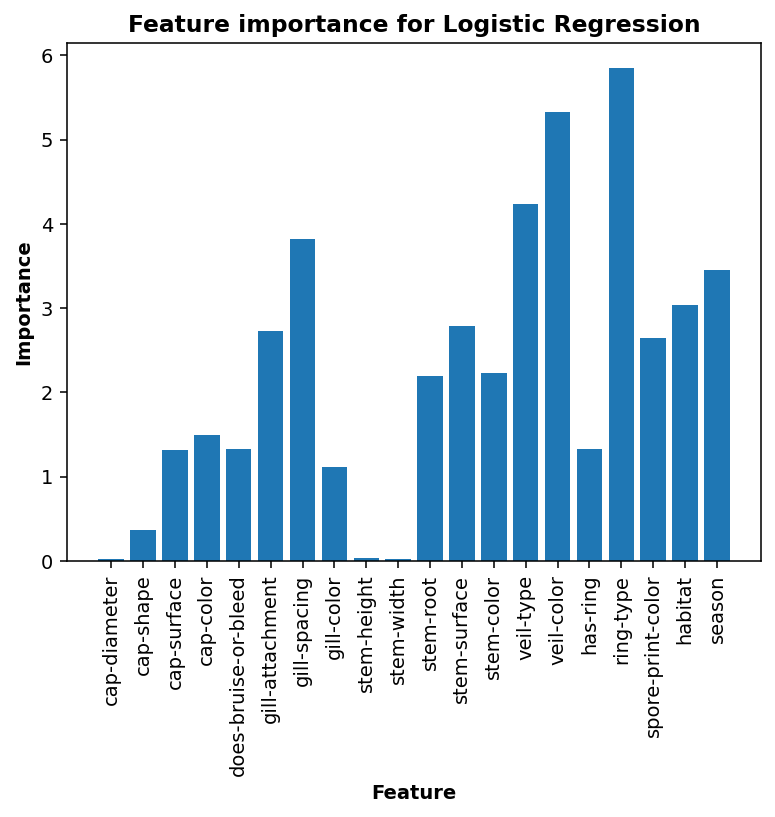

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=140)
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title("Feature importance for Logistic Regression", fontweight='bold')
plt.xlabel(xlabel="Feature", fontweight='bold')
plt.ylabel(ylabel="Importance", fontweight='bold')
plt.xticks(rotation=90)

In [ ]:
feature_importance.sort_values('Importance', ascending = False) #Las features mas importantes de mayor a menor

,Feature,Importance
16,ring-type,5.849452
14,veil-color,5.332319
13,veil-type,4.238662
6,gill-spacing,3.819160
19,season,3.446616
18,habitat,3.033490
11,stem-surface,2.793305
5,gill-attachment,2.725308
17,spore-print-color,2.651177
12,stem-color,2.230120
